In [16]:
from hfscf import *
import numpy as np

### Для вычисления параметров молекулы водорода используем готовую функцию. Слегка модифицируем ее, чтобы в конце нам выдавались 1D  и 2D графики, а также энергии

In [48]:
def SCF (r=1.4632, Z=[1, 1], b1=hfscf.GTO["H"], b2=hfscf.GTO["H"], b=3 , vbs=False):
    
    # r - электронные степени свободы, R -ядерные степени свободы.
    R = [0, r]
    
    #  Созаем матрицу перекрывания 
    if vbs: print ("*) Generating overlap matrix S.")
    s_scf = hfscf.S(R, b1, b2, b)
    
    # Создаем Гамильтон.
    if vbs: print ("\n*) Generating Hamiltonian H.")
    h_scf = hfscf.H(R, Z, b1, b2, b)
        
    # Диагонализируем матрицу S и находим матрицу X
    # 
    if vbs: print ("\n*) Diagonalizing matrix S and finding diagonal matrix X.")
    X = hfscf.diagon(s_scf)
    Xa = X.getH()
    
    # Оцениваем плотность матрицы P.
    if vbs: print("\n*) Creating density matrix P.")
    p_scf = np.matrix([[0,0],[0,0]], dtype=np.float64)
    
    
    # Итеративно оптимизируем матрицу P
    if vbs: print("\n*) Starting with the SCF.")
        
    for iteration in range(50):
        
        # Конструируем матрицу Фока 
        # F = H + G
        if vbs: print("\n**) Generating the Fock matrix: calculating integral of two electrons.")
        g_scf = hfscf.G(r, p_scf, b1, b2, b)
        f_scf = h_scf + g_scf   
        
        # Генерируем матрицу F'
        # F' = X_adj * F * X
        if vbs: print("**) Changing the base of F.")
        f_tra = Xa * f_scf * X
        
        # Диагонализируем F' и строим C'
        if vbs: print("**) Diagonalizing F' and generating C'.")
        c_tra = hfscf.diagon2(f_tra)
        
        # Выводим матрицу C
        # C = X * C'
        if vbs: print("**) Constructing coefficient matrix C.")
        c_scf = X * c_tra
        
        # Из C получаем матрицу P
        if vbs: print("**) Recalculating density matrix P.")
        p_temp = hfscf.P(c_scf)       
        
        print("\nFinished the " + str(iteration + 1) + ". iteration.\n")

        # Проверяем сходимость
        if np.linalg.norm(p_temp - p_scf) < 1E-4:
            
            #Рассчитайтываем электронную энергию молекулы и полную энергию молекулы
            energy_electron = ener_elec(p_temp, h_scf, f_scf)
            energy_sum = ener_tot(r, Z, 0)    
            print(f'Electron energy:\t{energy_electron}')
            print(f'Total energy:\t{energy_sum}')

            #Строим графики 1D и 2D
            orbital(c_tra, r, b1, b2, b)
            orbital2D(c_scf, X, f_scf, r, b1, b2, b)    
            
            print("\n\n-->The self-consistent field IF has converged!")
            return {"S" : s_scf, "H" : h_scf, "X" : X, "F" : f_scf, "C" : c_scf, "P" : p_temp}
        else:
            p_scf = p_temp
            
            
    #Рассчитайтываем электронную энергию молекулы и полную энергию молекулы
    energy_electron = ener_elec(p_temp, h_scf, f_scf)
    energy_sum = ener_tot(r, Z, 0)        

    #Строим графики 1D и 2D
    orbital(c_tra, r, b1, b2, b)
    orbital2D(c_scf, X, f_scf, r, b1, b2, b)        
        
    print("\n\n-->The self-consistent field has NOT converged!\nReview assumptions.")
    return {"S" : s_scf, "H" : h_scf , "X" :  X , "F" : f_scf ,"C" : c_scf, "P" : p_temp}

*) Generating overlap matrix S.

*) Generating Hamiltonian H.

*) Diagonalizing matrix S and finding diagonal matrix X.

*) Creating density matrix P.

*) Starting with the SCF.

**) Generating the Fock matrix: calculating integral of two electrons.
**) Changing the base of F.
**) Diagonalizing F' and generating C'.
**) Constructing coefficient matrix C.
**) Recalculating density matrix P.

Finished the 1. iteration.


**) Generating the Fock matrix: calculating integral of two electrons.
**) Changing the base of F.
**) Diagonalizing F' and generating C'.
**) Constructing coefficient matrix C.
**) Recalculating density matrix P.

Finished the 2. iteration.


**) Generating the Fock matrix: calculating integral of two electrons.
**) Changing the base of F.
**) Diagonalizing F' and generating C'.
**) Constructing coefficient matrix C.
**) Recalculating density matrix P.

Finished the 3. iteration.


**) Generating the Fock matrix: calculating integral of two electrons.
**) Changing the b

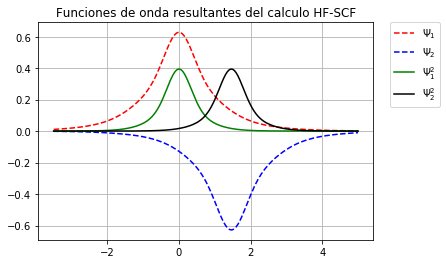

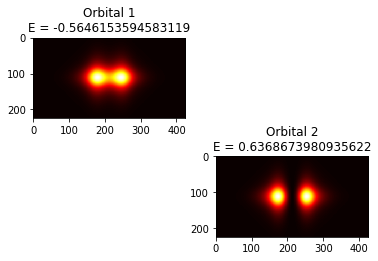



-->The self-consistent field IF has converged!


{'S': matrix([[0.99999999, 0.63749012],
         [0.63749012, 0.99999999]]), 'H': matrix([[-1.09920375, -0.91954841],
         [-0.91954841, -1.09920375]]), 'X': matrix([[ 0.55258063,  1.17442445],
         [ 0.55258063, -1.17442445]]), 'F': matrix([[-0.34684107, -0.57771139],
         [-0.57771139, -0.34684028]]), 'C': matrix([[ 0.55258114, -1.17442421],
         [ 0.55258013,  1.17442468]]), 'P': matrix([[0.61069182, 0.61069071],
         [0.61069071, 0.6106896 ]])}

In [49]:
SCF(vbs = True)

#### Success